In [1]:
import numpy as np
import scipy

from FlagRep import FlagRep, chordal_distance

from matplotlib import pyplot as plt

from sklearn.manifold import MDS

In [2]:
## Small example

n=10 # n samples
p=4 # p features

# the feature hierarchy 
A1 = np.array([0])
A2 = np.array([0,1,2])
A3 = np.array([0,1,2,3])

# make a list the feature hierarchy
# this stores indices of the features
Aset = [A1, A2, A3]

# number of trials
n_trials = 1000



seed = 1
    
#set random seed
np.random.seed = seed
    
# randomly generate a data matrix
D = np.zeros((n,p))
D[:,0] = np.random.normal(0,1,n) #d_1
D[:,1] = np.random.normal(0,2,n) #d_2
D[:,2] = 2*D[:,1]                #d_3
D[:,3] = np.random.normal(0,3,n) #d_4

FlagRep(D, Aset)

(array([[-0.21637472, -0.35825093, -0.42605791],
        [-0.1104031 ,  0.08913733,  0.26278869],
        [ 0.64935832,  0.11914854,  0.28821957],
        [ 0.37370801, -0.04066267,  0.07114233],
        [ 0.04513786, -0.11986269, -0.02467646],
        [ 0.08519743,  0.32438667, -0.70858576],
        [ 0.21574296,  0.47421656, -0.22468984],
        [ 0.07539406, -0.4894455 , -0.12187612],
        [-0.05608878, -0.29932318,  0.14968863],
        [-0.56124679,  0.41741418,  0.2661509 ]]),
 array([1, 2, 3]))

In [3]:
# grass pasture = 5
# corn notill = 2
# data from https://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes#Indian_Pines


data = scipy.io.loadmat('../data/Indian_pines.mat')
labels = scipy.io.loadmat('../data/Indian_pines_gt.mat')

In [4]:
classes = [2,3,4,5,6,8,10,11,12,13,14,15]

/home/nate/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


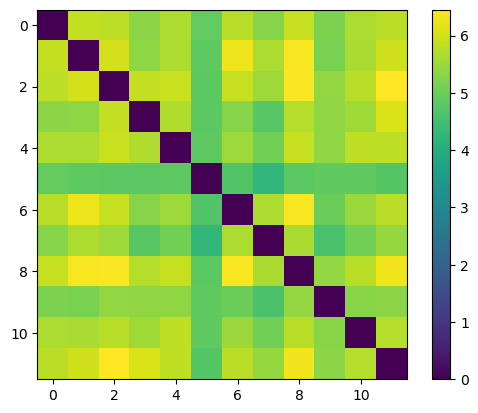

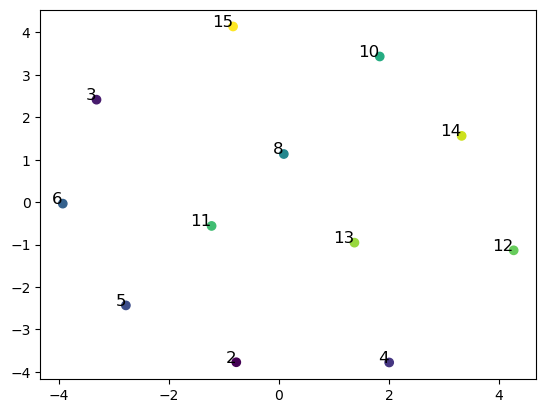

In [5]:
Aset = [np.arange(40),np.arange(80)]
np.random.seed = 420

n_samples = 200

Xs = []
fl_types = []

for c in classes:
    idx = (labels['indian_pines_gt'] == c)
    sel_data = data['indian_pines'][idx]
    x = sel_data[np.random.choice(len(sel_data), size = n_samples),:]
    X, fl_type = FlagRep(x, Aset, eps_rank=1000)
    Xs.append(X)
    fl_types.append(fl_type)

p = len(fl_types)
dist_mat = np.zeros((p,p))
for i in range(p):
    for j in range(i+1,p):
        x = Xs[i]
        y = Xs[j]
        fl_type_x = fl_types[i]
        fl_type_y = fl_types[j]
        Bs_x = [np.arange(fl_type_x[0]),np.arange(fl_type_x[0]+1,fl_type_x[1])]
        Bs_y = [np.arange(fl_type_y[0]),np.arange(fl_type_y[0]+1,fl_type_y[1])]
        dist = chordal_distance(x, y, Bs_x, Bs_y)
        dist_mat[i,j] = dist
        dist_mat[j,i] = dist

plt.figure()
plt.imshow(dist_mat)
plt.colorbar()


mds = MDS(n_components=2, dissimilarity='precomputed')
vis_data = mds.fit_transform(dist_mat)

plt.figure()
plt.scatter(vis_data[:,0], vis_data[:,1],c = classes)

# Add labels to the points
for i in range(len(classes)):
    plt.text(vis_data[:,0][i], vis_data[:,1][i], classes[i], fontsize=12, ha='right')




In [6]:
fl_types

[array([14, 21]),
 array([14, 24]),
 array([18, 26]),
 array([20, 25]),
 array([16, 22]),
 array([14, 17]),
 array([13, 24]),
 array([10, 19]),
 array([17, 29]),
 array([16, 20]),
 array([15, 21]),
 array([24, 32])]

/home/nate/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


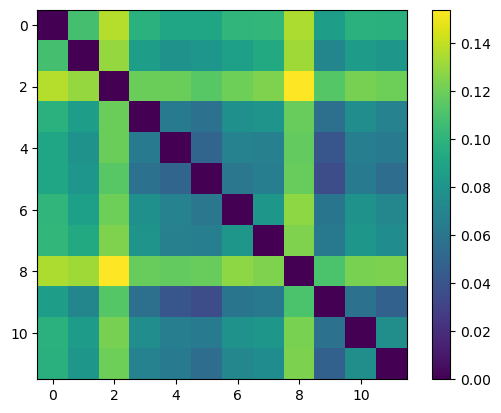

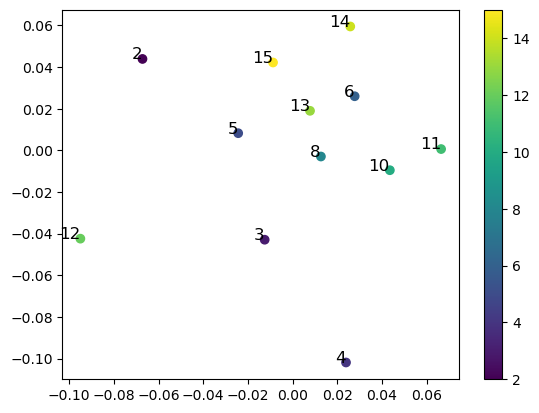

In [7]:
max_dim = np.max(np.vstack(fl_types))
fl_type = list(np.arange(1,max_dim+1))

np.random.seed = 420

n_samples = 200

Xs = []
fl_types = []

for c in classes:
    idx = (labels['indian_pines_gt'] == c)
    sel_data = data['indian_pines'][idx]
    x = sel_data[np.random.choice(len(sel_data), size = n_samples),:]
    U,_,_ = np.linalg.svd(x)
    X = U[:,:max_dim]
    Xs.append(X)
    fl_types.append(fl_type)

p = len(fl_types)
dist_mat = np.zeros((p,p))
for i in range(p):
    for j in range(i+1,p):
        x = Xs[i]
        y = Xs[j]
        fl_type_x = fl_types[i]
        fl_type_y = fl_types[j]
        Bs_x = [np.arange(fl_type_x[0]),np.arange(fl_type_x[0]+1,fl_type_x[1])]
        Bs_y = [np.arange(fl_type_y[0]),np.arange(fl_type_y[0]+1,fl_type_y[1])]
        dist = chordal_distance(x, y, Bs_x, Bs_y)
        dist_mat[i,j] = dist
        dist_mat[j,i] = dist

plt.figure()
plt.imshow(dist_mat)
plt.colorbar()


mds = MDS(n_components=2, dissimilarity='precomputed')
vis_data = mds.fit_transform(dist_mat)

plt.figure()
plt.scatter(vis_data[:,0], vis_data[:,1], c = classes)
plt.colorbar()

# Add labels to the points
for i in range(len(classes)):
    plt.text(vis_data[:,0][i], vis_data[:,1][i], classes[i], fontsize=12, ha='right')

Separate between two classes

In [8]:
# grass pasture = 5
# corn notill = 2
# data from https://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes#Indian_Pines


data = scipy.io.loadmat('../data/Indian_pines.mat')
labels = scipy.io.loadmat('../data/Indian_pines_gt.mat')

In [9]:
class1 = 5
class2 = 2

In [10]:
idx = (labels['indian_pines_gt'] == class1) |  (labels['indian_pines_gt'] == class2)

In [11]:
sel_data = data['indian_pines'][idx]
sel_labels = labels['indian_pines_gt'][idx]

In [12]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# sel_data = ss.fit_transform(sel_data)

In [13]:
np.random.seed = 420

Aset = [np.arange(40),np.arange(80)]

Xs = []
fl_types = []
k=100
for id in [class1,class2]:
    idx = sel_labels == id
    for i in range(30):
        x_sel = sel_data[idx]
        x = x_sel[np.random.choice(len(x_sel), size = k),:]
        X, fl_type = FlagRep(x,Aset, eps_rank=1300)
        Xs.append(X)
        fl_types.append(fl_type)


In [14]:
max_dim = np.max(np.vstack(fl_types))

In [15]:
fl_types

[array([11, 20]),
 array([11, 19]),
 array([11, 17]),
 array([12, 19]),
 array([10, 16]),
 array([12, 20]),
 array([11, 19]),
 array([10, 17]),
 array([10, 17]),
 array([10, 16]),
 array([12, 18]),
 array([12, 20]),
 array([12, 20]),
 array([12, 19]),
 array([11, 18]),
 array([11, 17]),
 array([12, 18]),
 array([12, 19]),
 array([12, 19]),
 array([12, 18]),
 array([10, 17]),
 array([12, 20]),
 array([12, 19]),
 array([13, 21]),
 array([12, 18]),
 array([10, 18]),
 array([11, 17]),
 array([12, 19]),
 array([11, 17]),
 array([12, 20]),
 array([ 7, 19]),
 array([ 7, 17]),
 array([ 8, 21]),
 array([ 8, 21]),
 array([ 8, 21]),
 array([ 8, 21]),
 array([ 7, 19]),
 array([ 7, 18]),
 array([ 8, 20]),
 array([ 8, 20]),
 array([ 8, 19]),
 array([ 7, 19]),
 array([ 8, 18]),
 array([ 8, 22]),
 array([ 8, 20]),
 array([ 7, 18]),
 array([ 9, 22]),
 array([ 9, 21]),
 array([ 7, 18]),
 array([ 7, 18]),
 array([ 7, 17]),
 array([ 9, 22]),
 array([ 9, 21]),
 array([ 7, 18]),
 array([ 8, 19]),
 array([ 8

In [16]:
p = len(fl_types)
dist_mat = np.zeros((p,p))
for i in range(p):
    for j in range(i+1,p):
        x = Xs[i]
        y = Xs[j]
        fl_type_x = fl_types[i]
        fl_type_y = fl_types[j]
        Bs_x = [np.arange(fl_type_x[0]),np.arange(fl_type_x[0]+1,fl_type_x[1])]
        Bs_y = [np.arange(fl_type_y[0]),np.arange(fl_type_y[0]+1,fl_type_y[1])]
        dist = chordal_distance(x, y, Bs_x, Bs_y)
        dist_mat[i,j] = dist
        dist_mat[j,i] = dist
        

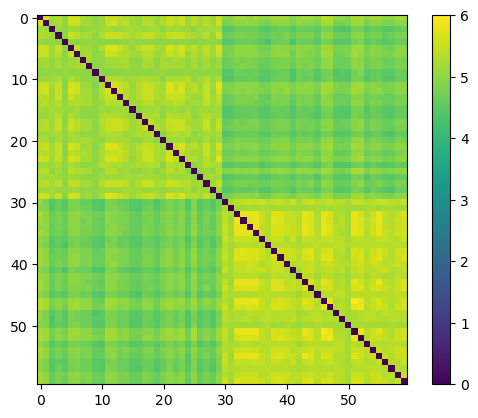

In [17]:
plt.imshow(dist_mat)
plt.colorbar()

/home/nate/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


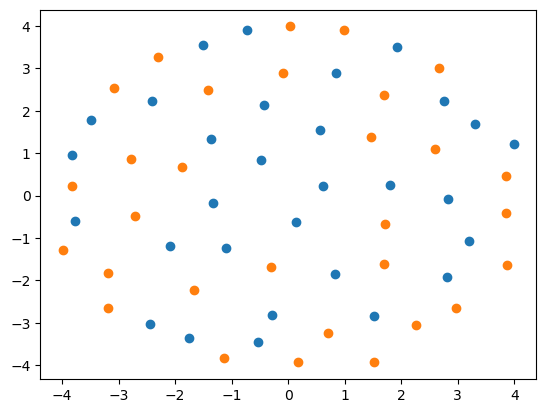

In [18]:

mds = MDS(n_components=2,dissimilarity='precomputed')
vis_data = mds.fit_transform(dist_mat)

plt.scatter(vis_data[:p//2,0],vis_data[:p//2,1], color = 'tab:blue')
plt.scatter(vis_data[p//2:,0],vis_data[p//2:,1], color = 'tab:orange')

In [19]:
n_sing_vals = max_dim

np.random.seed = 420

Xs = []
fl_types = []
k=100
for id in [class1,class2]:
    idx = sel_labels == id
    for i in range(30):
        x_sel = sel_data[idx]
        x = x_sel[np.random.choice(len(x_sel), size = k),:]
        U,_,_ = np.linalg.svd(x, full_matrices=False)
        Xs.append(U[:,:n_sing_vals])
        fl_types.append(list(np.arange(1,n_sing_vals+1)))

In [20]:
p = len(fl_types)
dist_mat = np.zeros((p,p))
for i in range(p):
    for j in range(i+1,p):
        x = Xs[i]
        y = Xs[j]
        fl_type_x = fl_types[i]
        fl_type_y = fl_types[j]
        Bs_x = [np.arange(fl_type_x[0]),np.arange(fl_type_x[0]+1,fl_type_x[1])]
        Bs_y = [np.arange(fl_type_y[0]),np.arange(fl_type_y[0]+1,fl_type_y[1])]
        dist = chordal_distance(x, y, Bs_x, Bs_y)
        dist_mat[i,j] = dist
        dist_mat[j,i] = dist
        

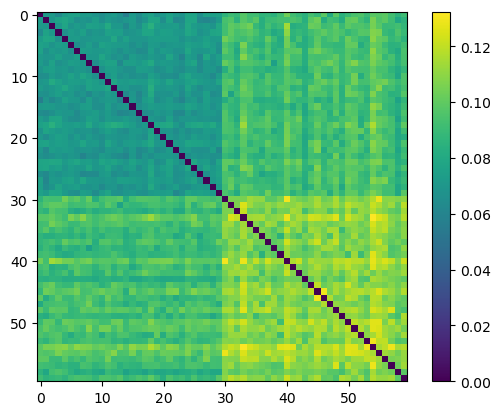

In [21]:
plt.imshow(dist_mat)
plt.colorbar()

/home/nate/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


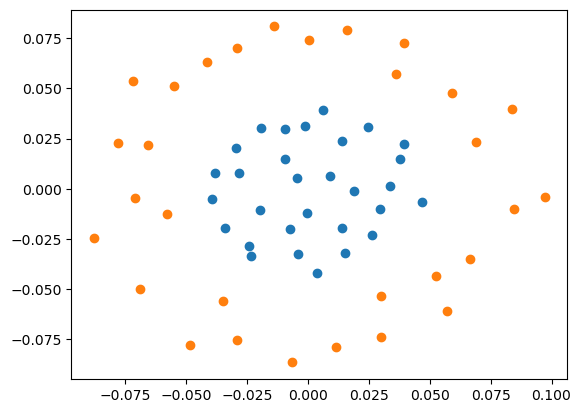

In [22]:

mds = MDS(n_components=2,dissimilarity='precomputed')
vis_data = mds.fit_transform(dist_mat)

plt.scatter(vis_data[:p//2,0],vis_data[:p//2,1], color = 'tab:blue')
plt.scatter(vis_data[p//2:,0],vis_data[p//2:,1], color = 'tab:orange')